In [74]:
import numpy as np
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from emily import *

Using TensorFlow backend.


In [8]:
d=dirlist('/home/vasileios.skliris/EMILY/injections/cbcs/cbc_00/H')
inj0=load_inj('cbc_00',d[np.random.randint(0,len(d))],'H')


In [9]:
fs=2048
inj=1e21*inj0

l=32
for l in [128,64,32,16,8,4]:
    t=np.arange(0,l,1/fs)
    noise=np.random.randn(len(t))

    signal=np.hstack((np.zeros(np.int(fs*(l-4)/2)), inj ,np.zeros(np.int(fs*(l-4)/2))))

    data=signal+noise

    fft_noise=np.fft.fft(noise)
    fft_signal=np.fft.fft(signal)
    fft_data=np.fft.fft(data)


    print(SNR(data,signal,noise,maximum=True,fs=2048))

    Rn,In=[],[]
    for num in fft_noise:
        Rn.append(num.real)
        In.append(num.imag)

    Rs,Is=[],[]
    for num in fft_signal:
        Rs.append(num.real)
        Is.append(num.imag)

    Rd,Id=[],[]
    for num in fft_data:
        Rd.append(num.real)
        Id.append(num.imag)
        
    plt.figure(figsize=(15,5))

    plt.subplot(1,4,1)
    plt.plot(Rn,In,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,2)
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,3)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,4)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.figure(figsize=(15,3))
    plt.plot(t,signal+noise,'b')
    plt.plot(t,signal,'r')
    #plt.xlim(int(l/2-2), int(l/2+2))
    plt.xlim(0,l)
    plt.ylim(np.min(signal+noise), np.max(signal+noise))


    plt.show()

12.266995188460383
10.213691395629196
11.662194981341026
10.098237435722835
12.598125228317404
12.142113941989846


In [10]:
fs=2048
l=1

for l in [3,2,1,0.5,0.25,0.125]:
    t=np.arange(4-l,4,1/fs)#np.arange(0,l,1/fs)###
    noise=np.random.randn(len(t))
    signal=inj[int((4-l)*fs):]#inj[0:int(l*fs)]#inj[int((4-l)*fs):]#

    data=signal+noise

    fft_noise=np.fft.fft(noise)
    fft_signal=np.fft.fft(signal)
    fft_data=np.fft.fft(data)


    print(SNR(data,signal,noise,maximum=True,fs=2048))

    Rn,In=[],[]
    for num in fft_noise:
        Rn.append(num.real)
        In.append(num.imag)

    Rs,Is=[],[]
    for num in fft_signal:
        Rs.append(num.real)
        Is.append(num.imag)

    Rd,Id=[],[]
    for num in fft_data:
        Rd.append(num.real)
        Id.append(num.imag)
    plt.figure(figsize=(15,5))


    plt.subplot(1,4,1)
    plt.plot(Rn,In,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,2)
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,3)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'b*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.subplot(1,4,4)
    plt.plot(Rd,Id,'b*')
    plt.plot(Rs,Is,'r*')
    plt.xlim([min(Rd),max(Rd)])
    plt.ylim([min(Id),max(Id)])

    plt.figure(figsize=(15,3))
    plt.plot(t,signal+noise,'b')
    plt.plot(t,signal,'r')
    #plt.xlim(0, l)
    plt.xlim(4-l,4)
    plt.ylim(np.min(signal+noise), np.max(signal+noise))



    plt.show()

8.784921097520646
10.150080383800749
15.694503729932311
14.338372943138944
646.4298675406526
311.8782383553833


/home/vasileios.skliris/env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


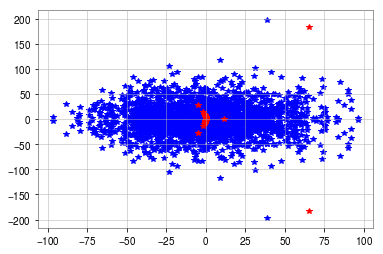

In [ ]:
from math import ceil

def load_noise(fs,date_file,detector,name,ind='all'): #  Loading the file with the real noise segment.
    noise=[]
    with open('/home/vasileios.skliris/EMILY/ligo_data/'+str(fs)+'/'+date_file+'/'+detector+'/'+name,'r') as f:
        if isinstance(ind,str) and ind=='all':
            for line in f: noise.append(float(line))
        else:
            for i in range(0,ind[0]):
                next(f)
            for i in ind:
                noise.append(float(next(f)))

    return np.array(noise)

def index_combinations(detectors
                       ,inst
                       ,length
                       ,fs
                       ,size
                       ,start_from_sec=0):
    
    indexes={}

    if inst==1:
        for det in detectors:
            indexes[det]=np.arange(start_from_sec*fs,start_from_sec*fs+size*length*fs, length*fs)
            
    elif inst>=len(detectors):
        
        batches=int(ceil(size/(inst*(inst-1))))
        
        for det in detectors:
            indexes[det]=np.zeros(inst*(inst-1)*batches)

        d=np.int_(range(inst))

        if len(detectors)==1:
            indexes[detectors[0]]=np.arange(start_from_sec*length*fs,(start_from_sec+size)*length*fs, length*fs)



        elif len(detectors)==2:
            for b in range(0,batches):
                for j in range(1,inst):
                    indexes[detectors[0]][(b*(inst-1)+j-1)*inst:(b*(inst-1)+j)*inst]=(start_from_sec+(b*inst+d)*length)*fs
                    indexes[detectors[1]][(b*(inst-1)+j-1)*inst:(b*(inst-1)+j)*inst]=(start_from_sec+(b*inst+np.roll(d,j))*length)*fs
            t1=time.time()

        elif len(detectors)==3:
            for b in range(0,batches):
                for j in range(1,inst):

                    indexes[detectors[0]][(b*(inst-1)+j-1)*inst:(b*(inst-1)+j)*inst]=(start_from_sec+(b*inst+d)*length)*fs
                    indexes[detectors[1]][(b*(inst-1)+j-1)*inst:(b*(inst-1)+j)*inst]=(start_from_sec+(b*inst+np.roll(d,j))*length)*fs
                    indexes[detectors[2]][(b*(inst-1)+j-1)*inst:(b*(inst-1)+j)*inst]=(start_from_sec+(b*inst+np.roll(d,-j))*length)*fs

    for det in detectors:
        indexes[det]=np.int_(indexes[det][:size])

    return(indexes)


    
################################################################################
#################### DOCUMENTATION OF FAR_test  ################################
################################################################################
#                                                                              #
# length:          (float) The length in seconds of the generated instantiatio #
#                  ns of data.                                                 #
#                                                                              #
# fs:              (int) The sample frequency of the data. Use powers of 2 for #
#                  faster calculations.                                        #
#                                                                              #
# size:            (int) The amound of instantiations you want to generate. Po #
#                  wers of are more convinient.                                #
#                                                                              #
# detectors:       (string) A string with the initial letter of the detector y #
#                  ou want to include. H for LIGO Hanford, L for LIGO Livingst #
#                  on, V for Virgo and K for KAGRA. Example: 'HLV' or 'HLVK' o # 
#                  r 'LV'.                                                     #
#                                                                              #                                   
# spec:            (optional/boolean): The option to also generate spectrogram #
#                  s. Default is false. If true it will generate a separate da #
#                  taset with pictures of spectrograms of size related to the  #
#                  variable res below.                                         #
#                                                                              #
# phase:           (optional/boolean): Additionaly to spectrograms you can gen #
#                  erate phasegrams. Default is false. If true it will generat #
#                  e an additional picture under the spectrograms with the sam #
#                  e size. The size will be the same as spectrogram.           #
#                                                                              #
# res:             NEED MORE INFO HERE.                                        #
#                                                                              #
# noise_file:      (optional if noise_type is 'optimal'/ [str,str]) The name o #
#                  f the real data file you want to use as source. The path is #
#                  setted in load_noise function on emily.py. THIS HAS TO BE   #
#                  FIXED LATER!                                                #
#                  The list includes ['date_folder', 'name_of_file']. Date_fol #
#                  der is inside ligo data and contains segments of that day w #
#                  ith the name witch should be the name_of_file.              #
#                                                                              #
# t:               (optinal except psd_mode='default/ float)The duration of th # 
#                  e envelope of every instantiation used to generate the psd. # 
#                  It is used in psd_mode='default'. Prefered to be integral o #
#                  f power of 2. Default is 32.                                #
#                                                                              #
# batch_size:      (odd int)The number of instantiations we will use for one b #
#                  atch. To make our noise instanstiation indipendent we need  #
#                  a specific number given the detectors. For two detectors gi #
#                  ves n-1 andf or three n(n-1) indipendent instantiations.    #
#                                                                              #
# name:            (optional/string) A special tag you might want to add to yo #
#                  ur saved dataset files. Default is ''.                      #
#                                                                              #
# destination_path:(optional/string) The path where the dataset will be saved, # 
#                  the default is '/home/vasileios.skliris/EMILY/datasets/'    #
#                                                                              #
# demo:            (optional/boolean) An option if you want to have a ploted o #
#                  ovrveiw of the data that were generated. It will not work i #
#                  n command line enviroment. Default is false.                #
################################################################################

In [81]:

from emily import *
from math import ceil
import time


    
################################################################################
#################### DOCUMENTATION OF FAR_test  ################################
################################################################################
#                                                                              #
# length:          (float) The length in seconds of the generated instantiatio #
#                  ns of data.                                                 #
#                                                                              #
# fs:              (int) The sample frequency of the data. Use powers of 2 for #
#                  faster calculations.                                        #
#                                                                              #
# size:            (int) The amound of instantiations you want to generate. Po #
#                  wers of are more convinient.                                #
#                                                                              #
# detectors:       (string) A string with the initial letter of the detector y #
#                  ou want to include. H for LIGO Hanford, L for LIGO Livingst #
#                  on, V for Virgo and K for KAGRA. Example: 'HLV' or 'HLVK' o # 
#                  r 'LV'.                                                     #
#                                                                              #                                   
# spec:            (optional/boolean): The option to also generate spectrogram #
#                  s. Default is false. If true it will generate a separate da #
#                  taset with pictures of spectrograms of size related to the  #
#                  variable res below.                                         #
#                                                                              #
# phase:           (optional/boolean): Additionaly to spectrograms you can gen #
#                  erate phasegrams. Default is false. If true it will generat #
#                  e an additional picture under the spectrograms with the sam #
#                  e size. The size will be the same as spectrogram.           #
#                                                                              #
# res:             NEED MORE INFO HERE.                                        #
#                                                                              #
# noise_file:      (optional if noise_type is 'optimal'/ [str,str]) The name o #
#                  f the real data file you want to use as source. The path is #
#                  setted in load_noise function on emily.py. THIS HAS TO BE   #
#                  FIXED LATER!                                                #
#                  The list includes ['date_folder', 'name_of_file']. Date_fol #
#                  der is inside ligo data and contains segments of that day w #
#                  ith the name witch should be the name_of_file.              #
#                                                                              #
# t:               (optinal except psd_mode='default/ float)The duration of th # 
#                  e envelope of every instantiation used to generate the psd. # 
#                  It is used in psd_mode='default'. Prefered to be integral o #
#                  f power of 2. Default is 32.                                #
#                                                                              #
# batch_size:      (odd int)The number of instantiations we will use for one b #
#                  atch. To make our noise instanstiation indipendent we need  #
#                  a specific number given the detectors. For two detectors gi #
#                  ves n-1 andf or three n(n-1) indipendent instantiations.    #
#                                                                              #
# name:            (optional/string) A special tag you might want to add to yo #
#                  ur saved dataset files. Default is ''.                      #
#                                                                              #
# destination_path:(optional/string) The path where the dataset will be saved, # 
#                  the default is '/home/vasileios.skliris/EMILY/datasets/'    #
#                                                                              #
################################################################################

def FAR_test(model            # Path of the model to be tested
             ,length           # Length of generated data, injections must have this duration
             ,fs               # Sample frequency, injections must have this fs             
             ,detectors='HLV'  # Initials of the detectors we want data from
             ,spec=False
             ,phase=False
             ,res=128
             ,noise_file=None  
             ,t=32             # Duration of noise to calculate PSD.
             ,batch_size=11    # Number of instantiations of each detector for every group (batch) of testing
             ,starting_point=0
             ,size='all'       # Number of data we want to test
             ,model_source_path='/home/vasileios.skliris/EMILY/trainings/'
             ,destination_path='/home/vasileios.skliris/EMILY/trainings/'):
    
  
    
    ## INPUT CHECKING ##########
    #
    
    #model
    
    #length
    if (not (isinstance(length,float) or isinstance(length,int)) and length>0):
        raise ValueError('The length value has to be a possitive float or integer.')
        
    # fs
    if not isinstance(fs,int) or fs<=0:
        raise ValueError('Sample frequency has to be a positive integer.')
    
    # detectors
    for d in detectors:
        if (d!='H' and d!='L' and d!='V' and d!='K'): 
            raise ValueError('Not acceptable character for detector. You should include: \nH for LIGO Hanford\nL for LIGO Livingston \nV for Virgo \nK for KAGRA\nFor example: \'HLV\', \'HLVK\'')
    # res
    if not isinstance(res,int):
        raise ValueError('Resolution variable (res) can only be integral')
    
    # noise_file    
    if noise_file==None:
        raise TypeError('You need a real noise file as a source.')         
    if noise_file!=None and len(noise_file)==2 and isinstance(noise_file[0],str) and isinstance(noise_file[1],str):
        for d in detectors:
            if os.path.isdir('/home/vasileios.skliris/EMILY/ligo_data/'+str(fs)+'/'+noise_file[0]+'/'+d+'/'+noise_file[1]+'.txt'):
                raise FileNotFoundError('No such file or directory: \'/home/vasileios.skliris/EMILY/ligo_data/'+str(fs)+'/'+noise_file[0]+'/'+d+'/'+noise_file[1]+'.txt\'')
                
    # t
    if not isinstance(t,int):
        raise ValueError('t needs to be an integral')
        
    # batch size:
    if not (isinstance(batch_size, int) and batch_size%2!=0):
        raise ValueError('batch_size has to be an odd integer')
    
    # destination_path
    if not os.path.isdir(destination_path): 
        raise ValueError('No such path '+destination_path)
    #                        
    ########## INPUT CHECKING ##  


    
    if isinstance(model,str):
        trained_model = load_model(model_source_path+ model +'.h5')
    else:
        trained_model = model    #If model is not already in the script you import it my calling the name    
    
    

    if 'H' in detectors: noise_segH=load_noise(fs,noise_file[0],'H',noise_file[1])
    if 'L' in detectors: noise_segL=load_noise(fs,noise_file[0],'L',noise_file[1])
    if 'V' in detectors: noise_segV=load_noise(fs,noise_file[0],'V',noise_file[1])
        
    if size=='all':
        if batch_size==1: 
            size= int((len(noise_segH)/fs-t-starting_point)/length)
        else: 
            size= int((len(noise_segH)/fs-t-starting_point)/length)*(batch_sise-1)


    ind=index_combinations(detectors = detectors
                           ,inst = batch_size
                           ,length = length
                           ,fs = fs
                           ,size = size
                           ,start_from_sec=starting_point)
    
    predictions=[]
    
    t0=time.time()
    for i in range(0,size):
        
        data_instantiation=[]


        if 'H'in detectors:

            noiseH=noise_segH[ind['H'][i]:ind['H'][i]+t*fs]           # Calling the real noise segments
            H_back=TimeSeries(noiseH,sample_rate=fs)                  # Making the noise a TimeSeries
            asdH=H_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for
                                                                      # whitening later                
            h=H_back.whiten(1,0.5,asd=asdH)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] # Whitening data

        if 'L'in detectors:

            noiseL=noise_segL[ind['L'][i]:ind['L'][i]+t*fs]           # Calling the real noise segments
            L_back=TimeSeries(noiseL,sample_rate=fs)                  # Making the noise a TimeSeries
            asdL=L_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for 
                                                                      # whitening later                
            l=L_back.whiten(1,0.5,asd=asdL)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] # Whitening data


        if 'V'in detectors:

            noiseV=noise_segV[ind['V'][i]:ind['V'][i]+t*fs]           # Calling the real noise segments
            V_back=TimeSeries(noiseV,sample_rate=fs)                  # Making the noise a TimeSeries
            asdV=V_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for
                                                                      # whitening later                
            v=V_back.whiten(1,0.5,asd=asdV)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] # Whitening data

        
        dumie=[]
        if 'H' in detectors: dumie.append(np.array(h))
        if 'L' in detectors: dumie.append(np.array(l))
        if 'V' in detectors: dumie.append(np.array(v))

        data=np.array([dumie])
        label=np.array([0])

        label=label.reshape(1,1)
        #data=data.reshape(1,3,fs*length)
        
        
        data = data.transpose((0,2,1))
        
        #print(data.shape,label.shape)

        predictions.append(trained_model.predict_proba(data, batch_size=1, verbose=0))
        
        if time.time()-t0>=0.1 or i==size-1:
            print(end='\r')
            print(str(i+1)+'/'+str(size),end='')
            t0=time.time()

    pr=(np.squeeze(np.array(predictions)))[:,1]
    return(pr)





In [67]:
pr=FAR_test(model='RUN_03/realhlv_30TO10'            # Path of the model to be tested
             ,length=4           # Length of generated data, injections must have this duration
             ,fs=2048               # Sample frequency, injections must have this fs             
             ,detectors='HLV'  # Initials of the detectors we want data from
             ,spec=False
             ,phase=False
             ,res=128
             ,noise_file=['20170730','SEG0_1185423859_9090s.txt'] 
             ,t=32             # Duration of noise to calculate PSD.
             ,batch_size=11    # Number of instantiations of each detector for every group (batch) of testing
             ,starting_point=32
             ,size=10000       # Number of data we want to test
             ,model_source_path='/home/vasileios.skliris/EMILY/trainings/'
             ,destination_path='/home/vasileios.skliris/EMILY/trainings/')

10000/10000

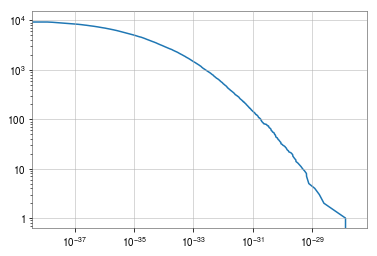

In [68]:
%matplotlib inline
plt.loglog(np.sort(pr)[-1::-1],np.arange(len(pr)))
#n1 ,b1 ,p1 =plt.hist(pr,bins=100,log=True,cumulative=-1,color='r',alpha=0.5)


Loading file ...cbc/cbc_test11/HLV_time_cbc_with_real_noise_SNR6_XM with data shape:   (10000, 8192, 3)
Loading file ...noise/real/real_test11/HLV_time_real_noise_No_1_XM with data shape:   (10000, 8192, 3)
(10000, 8192, 3)
Files were fused with data shape:   (10000, 8192, 3) (10000, 1)
... Loading dataset with data shape:   (10000, 8192, 3)
10000/10000 [==============================] - 96s 10ms/step


In [157]:
def ROC_test(model,sets,sizes, plots=False):
    
    data=data_fusion(sets,sizes)
    labels=data[1]
    

    pr=test_model(model,test_data=data)

    
    size=len(pr)
    
    ROC=[]
    x,y=[],[]
    dist=[]

    thr =np.sort(pr[:,1])[::int(sum(sizes)/100)]

    for threshold in thr:
        TP,FP,TN,FN=0,0,0,0
        CP,CN=0,0

        for i in np.arange(0,len(labels)):
            if labels[i]==1: # CONDITION POSITIVE
                if pr[i][1] >= threshold: TP+=1    #pr[i][1] is the signal probability
                elif pr[i][1]< threshold: FN+=1
                CP+=1

            if labels[i]==0: # CONDITION NEGATIVE
                if pr[i][1] >= threshold: FP+=1
                elif pr[i][1]< threshold: TN+=1
                CN+=1
        TPR, FNR = TP/CP, FN/CP  # MAKING ALL OF THEM 
        TNR, FPR = TN/CN, FP/CN  # PROBABILITIES, RATES

        x.append(FPR)
        y.append(TPR)
        #dist.append(np.sqrt((0-FPR)**2+(1-TPR)**2))
    
    if plots==True:
        plt.figure(figsize=(10,5))
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.semilogx(x,y,'r*')
        plt.semilogx(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'k--')

        f = interp1d(x, y)
        x_int=np.arange(x[x.index(min(x))],x[x.index(max(x))],0.001)

        plt.semilogx(x_int,f(x_int))
        plt.xlim([1/sum(sizes),1])
        plt.ylim([1/sum(sizes),1])
        plt.show()

    return(x_int,f(x_int))

Loading file ...cbc/cbc_sudo_real1/HLV_time_cbc_with_sudo_real_noise_SNR8_XM with data shape:   (10000, 8192, 3)
Loading file ...noise/sudo_real/sudo_real1/HLV_time_sudo_real_noise_No1_XM with data shape:   (10000, 8192, 3)
(2000, 8192, 3)
Files were fused with data shape:   (2000, 8192, 3) (2000, 1)
... Loading dataset with data shape:   (2000, 8192, 3)
2000/2000 [==============================] - 20s 10ms/step


/home/vasileios.skliris/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


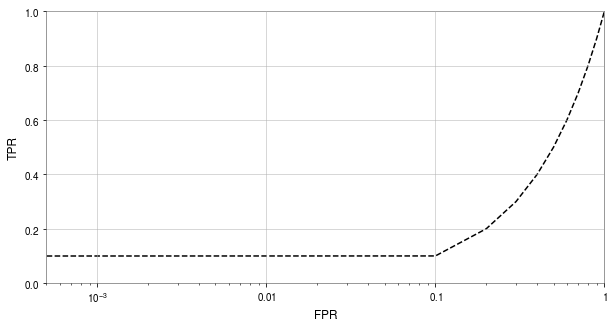

In [158]:
set1='cbc/cbc_sudo_real1/HLV_time_cbc_with_sudo_real_noise_SNR8_XM'
set2='noise/sudo_real/sudo_real1/HLV_time_sudo_real_noise_No1_XM'

model='RUN_07/realhlv_30TO10_2_toSNR12'


P=ROC_test(model,[set1,set2],[1000,1000],plots=True)

In [11]:
from emily import *
import random
def TAR_test(model
             ,parameters        
                       ,length           
                       ,fs               
                       ,size             
                       ,detectors='HLV'  
                       ,spec=True
                       ,phase=True
                       ,res=128
                       ,noise_file=None  
                       ,t=32             
                       ,batch_size=11
                       ,starting_point=0
                       ,name=''          
                       ,destination_path='/home/vasileios.skliris/EMILY/datasets/cbc/'
                       ,demo=False):       

    ## INPUT CHECKING ##########
    #
    
    # parameters
    if not (isinstance(parameters[0],str) and isinstance(parameters[1],str) and len(parameters)==3):
        raise ValueError('The parameters have to be three and in the form: [list, list , float/int]')
             
    if not (os.path.isdir('/home/vasileios.skliris/EMILY/injections/cbcs/'+parameters[0])):
        raise FileNotFoundError('No such file or directory: \'/home/vasileios.skliris/EMILY/injections/'+parameters[0]) 
    if (parameters[1]!='optimal' and parameters[1]!='sudo_real' and parameters[1]!='real'): 
        raise ValueError('Wrong type of noise, the only acceptable are: \n\'optimal\'\n\'sudo_real\'\n\'real\'')
 ##   if (parameters[2]<0):
 ##       raise ValueError('You cannot have a negative SNR')
    
    #length
    if (not (isinstance(length,float) or isinstance(length,int)) and length>0):
        raise ValueError('The length value has to be a possitive float or integer.')
        
    # fs
    if not isinstance(fs,int) or fs<=0:
        raise ValueError('Sample frequency has to be a positive integer.')
    
    # detectors
    for d in detectors:
        if (d!='H' and d!='L' and d!='V' and d!='K'): 
            raise ValueError('Not acceptable character for detector. You should include: \nH for LIGO Hanford\nL for LIGO Livingston \nV for Virgo \nK for KAGRA\nFor example: \'HLV\', \'HLVK\'')
    # res
    if not isinstance(res,int):
        raise ValueError('Resolution variable (res) can only be integral')
    
    # noise_file    
    if (parameters[1]=='sudo_real' or parameters[1]=='real') and noise_file==None:
        raise TypeError('If you use suno_real or real noise you need a real noise file as a source.')         
    if noise_file!=None and len(noise_file)==2 and isinstance(noise_file[0],str) and isinstance(noise_file[1],str):
        for d in detectors:
            if os.path.isdir('/home/vasileios.skliris/EMILY/ligo_data/'+str(fs)+'/'+noise_file[0]+'/'+d+'/'+noise_file[1]+'.txt'):
                raise FileNotFoundError('No such file or directory: \'/home/vasileios.skliris/EMILY/ligo_data/'+str(fs)+'/'+noise_file[0]+'/'+d+'/'+noise_file[1]+'.txt\'')
                
    # t
    if not isinstance(t,int):
        raise ValueError('t needs to be an integral')
        
    # batch size:
    if not (isinstance(batch_size, int) and batch_size%2!=0):
        raise ValueError('batch_size has to be an odd integer')

    # name
    if not isinstance(name,str): 
        raise ValueError('name optional value has to be a string')
    
    # destination_path
    if not os.path.isdir(destination_path): 
        raise ValueError('No such path '+destination_path)
    #                        
    ########## INPUT CHECKING ## 
    
    

    dataset = parameters[0]
    noise_type = parameters[1]
    snr_list = parameters[2]

    
    # Making a list of the injection names, so that we can sample randomly from them
    if 'H' in detectors: injectionH=random.sample(dirlist('/home/vasileios.skliris/EMILY/injections/cbcs/'+dataset+'/H'),size)
    if 'L' in detectors: injectionL=random.sample(dirlist('/home/vasileios.skliris/EMILY/injections/cbcs/'+dataset+'/L'),size)
    if 'V' in detectors: injectionV=random.sample(dirlist('/home/vasileios.skliris/EMILY/injections/cbcs/'+dataset+'/V'),size)
        
        
        
    fl, fm=20, int(fs/2)   # Integration limits for the calculation of analytical SNR

    magic={2048: 2**(-23./16.), 4096: 2**(-25./16.), 8192: 2**(-27./16.)}
    param=magic[fs]   # Magic number to mach the analytical computation of SNR and the match filter one:
                      # There was a mis-match which I coulndnt resolve how to fix this
                      # and its not that important, if we get another nobel I will address that.

    DATA={}
   

        ##########################
        #                        #
        # CASE OF OPTIMAL NOISE  #       
        #                        #
        ##########################
        
    if noise_type=='optimal':
        
        
        for SNR_FIN in snr_list:
            
            DATA[str(SNR_FIN)]=[]
        
            for i in range(0,size):
                
                if 'H' in detectors: inj_ind=i
                elif 'L' in detectors: inj_ind=i  
                elif 'V' in detectors: inj_ind=i

            
            
                if 'H' in detectors:

                    PSDH,XH,TH=simulateddetectornoise('aligo',t,fs,10,fs/2)   # Creation of the artificial noise.

                    injH=load_inj(dataset,injectionH[inj_ind],'H')        # Calling the templates generated with PyCBC
                    inj_len=len(injH)/fs                                  # Saving the length of the injection

                    if length==inj_len:                                       # I put a random offset for all injection
                        disp = np.random.randint(0,int(length*fs/2))          # so that the signal is not always in the 
                    elif length > inj_len:                                    # same place.
                        disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                 ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injH=injH[disp:]                              # Due to offset the injection file will be
                    if disp<0: 
                        injH=injH[0:-disp]  


                    injH=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injH
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 
                    H_back=TimeSeries(XH,sample_rate=fs)                      # Making the noise a TimeSeries
                    asdH=H_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for 
                                                                              # whitening later


                    injH_fft_0=np.fft.fft(injH)                       # Calculating the one sided fft of the template, 
                    injH_fft_0N=2*np.abs(injH_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0H=np.sqrt(param*2*(1/t)*np.sum(np.abs(injH_fft_0N*injH_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDH[t*fl-1:t*fm-1]))

                if 'L' in detectors:

                    PSDL,XL,TL=simulateddetectornoise('aligo',t,fs,10,fs/2)   # Creation of the artificial noise.

                    injL=load_inj(dataset,injectionL[inj_ind],'L')                # Calling the templates generated with PyCBC
                    inj_len=len(injL)/fs                                  # Saving the length of the injection

                    if 'H' not in detectors:
                        if length==inj_len:                                   # I put a random offset for all injection
                            disp = np.random.randint(0,int(length*fs/2))      # so that the signal is not always in the 
                        elif length > inj_len:                                    # same place.
                            disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                     ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injL=injL[disp:]                              # Due to offset the injection file will be
                    if disp<0: 
                        injL=injL[0:-disp]  

                    injL=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injL
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 

                    L_back=TimeSeries(XL,sample_rate=fs)                      # Making the noise a TimeSeries
                    asdL=L_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for
                                                                              # whitening later             

                    injL_fft_0=np.fft.fft(injL)                       # Calculating the one sided fft of the template, 
                    injL_fft_0N=2*np.abs(injL_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0L=np.sqrt(param*2*(1/t)*np.sum(np.abs(injL_fft_0N*injL_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDL[t*fl-1:t*fm-1]))

                if 'V' in detectors:

                    PSDV,XV,TV=simulateddetectornoise('avirgo',t,fs,10,fs/2)  # Creation of the artificial noise.

                    injV=load_inj(dataset,injectionV[inj_ind],'V')        # Calling the templates generated with PyCBC
                    inj_len=len(injV)/fs                                  # Saving the length of the injection

                    if ('H' and 'L') not in detectors:
                        if length==inj_len:                                   # I put a random offset for all injection
                            disp = np.random.randint(0,int(length*fs/2))      # so that the signal is not always in the 
                        elif length > inj_len:                                    # same place.
                            disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                     ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injV=injV[disp:]                              # Due to offset the injection file will be

                    if disp<0: 
                        injV=injV[0:-disp]                     
                    injV=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injV
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 


                    V_back=TimeSeries(XV,sample_rate=fs)                      # Making the noise a TimeSeries
                    asdV=V_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for 
                                                                              # whitening later                


                    injV_fft_0=np.fft.fft(injV)                       # Calculating the one sided fft of the template, 
                    injV_fft_0N=2*np.abs(injV_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0V=np.sqrt(param*2*(1/t)*np.sum(np.abs(injV_fft_0N*injV_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDV[t*fl-1:t*fm-1]))



                SNR0=0
                if 'H' in detectors: SNR0+=SNR0H**2
                if 'L' in detectors: SNR0+=SNR0L**2     # Calculation of combined SNR
                if 'V' in detectors: SNR0+=SNR0V**2
                SNR0=np.sqrt(SNR0)

                if 'H' in detectors:
                    fftH_cal=(SNR_FIN/SNR0)*injH_fft_0         # Tuning injection amplitude to the SNR wanted
                    injH_cal=np.real(np.fft.ifft(fftH_cal*fs))

                    HF=TimeSeries(XH+injH_cal,sample_rate=fs,t0=0)
                    h=HF.whiten(1,0.5,asd=asdH)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data


                if 'L' in detectors:

                    fftL_cal=(SNR_FIN/SNR0)*injL_fft_0         # Tuning injection amplitude to the SNR wanted
                    injL_cal=np.real(np.fft.ifft(fftL_cal*fs))

                    LF=TimeSeries(XL+injL_cal,sample_rate=fs,t0=0)
                    l=LF.whiten(1,0.5,asd=asdL)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data

                if 'V' in detectors:

                    fftV_cal=(SNR_FIN/SNR0)*injV_fft_0         # Tuning injection amplitude to the SNR wanted
                    injV_cal=np.real(np.fft.ifft(fftV_cal*fs))

                    VF=TimeSeries(XV+injV_cal,sample_rate=fs,t0=0)
                    v=VF.whiten(1,0.5,asd=asdV)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data

                dumie=[]
                if 'H' in detectors: dumie.append(np.array(h))
                if 'L' in detectors: dumie.append(np.array(l))
                if 'V' in detectors: dumie.append(np.array(v))
            
                DATA[str(SNR_FIN)].append(dumie)
            DATA[str(SNR_FIN)]=np.array(DATA[str(SNR_FIN)]).transpose((0,2,1))

            
            
        ############################
        #                          #
        # CASE OF SUDO-REAL NOISE  #       
        #                          #
        ############################
            
    if noise_type=='sudo_real':
        
        if 'H' in detectors: noise_segH=load_noise(fs,noise_file[0],'H',noise_file[1])
        if 'L' in detectors: noise_segL=load_noise(fs,noise_file[0],'L',noise_file[1])
        if 'V' in detectors: noise_segV=load_noise(fs,noise_file[0],'V',noise_file[1])
        
        
        for SNR_FIN in snr_list:
            
            DATA[str(SNR_FIN)]=[]
            
            ind=index_combinations(detectors = detectors
                       ,inst = 1
                       ,length = length
                       ,fs = fs
                       ,size = size
                       ,start_from_sec=starting_point)
        
            for i in range(0,size):
                
                if 'H' in detectors: inj_ind=i
                elif 'L' in detectors: inj_ind=i  
                elif 'V' in detectors: inj_ind=i

                if 'H' in detectors:

                    noiseH=noise_segH[ind['H'][i]:ind['H'][i]+t*fs]           # Calling the real noise segments
                    p, f = plt.psd(noiseH, Fs=fs, NFFT=fs, visible=False) # Generating the PSD of it
                    p, f=p[1::],f[1::]

                    PSDH,XH,TH=simulateddetectornoise([f,p],t,fs,10,fs/2)     # Feeding the PSD to generate the sudo-real noise.            

                    injH=load_inj(dataset,injectionH[inj_ind],'H')        # Calling the templates generated with PyCBC
                    inj_len=len(injH)/fs                                  # Saving the length of the injection

                    if length==inj_len:                                       # I put a random offset for all injection
                        disp = np.random.randint(0,int(length*fs/2))          # so that the signal is not always in the 
                    elif length > inj_len:                                    # same place.
                        disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                 ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injH=injH[disp:]                              # Due to offset the injection file will be

                    if disp<0: 
                        injH=injH[0:-disp]                     
                    injH=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injH
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 

                    H_back=TimeSeries(XH,sample_rate=fs)                      # Making the noise a TimeSeries
                    asdH=H_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for 
                                                                              # whitening later


                    injH_fft_0=np.fft.fft(injH)                       # Calculating the one sided fft of the template, 
                    injH_fft_0N=2*np.abs(injH_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0H=np.sqrt(param*2*(1/t)*np.sum(np.abs(injH_fft_0N*injH_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDH[t*fl-1:t*fm-1]))

                if 'L' in detectors:

                    noiseL=noise_segL[ind['L'][i]:ind['L'][i]+t*fs]           # Calling the real noise segments
                    p, f = plt.psd(noiseL, Fs=fs, NFFT=fs, visible=False) # Generating the PSD of it
                    p, f=p[1::],f[1::]

                    PSDL,XL,TL=simulateddetectornoise([f,p],t,fs,10,fs/2)     # Feeding the PSD to generate the sudo-real noise.

                    injL=load_inj(dataset,injectionL[inj_ind],'L')        # Calling the templates generated with PyCBC
                    inj_len=len(injL)/fs                                  # Saving the length of the injection

                    if 'H' not in detectors:
                        if length==inj_len:                                   # I put a random offset for all injection
                            disp = np.random.randint(0,int(length*fs/2))      # so that the signal is not always in the 
                        elif length > inj_len:                                    # same place.
                            disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                     ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injL=injL[disp:]                              # Due to offset the injection file will be

                    if disp<0: 
                        injL=injL[0:-disp]                     
                    injL=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injL
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 
                    L_back=TimeSeries(XL,sample_rate=fs)                      # Making the noise a TimeSeries
                    asdL=L_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for
                                                                              # whitening later             

                    injL_fft_0=np.fft.fft(injL)                       # Calculating the one sided fft of the template, 
                    injL_fft_0N=2*np.abs(injL_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0L=np.sqrt(param*2*(1/t)*np.sum(np.abs(injL_fft_0N*injL_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDL[t*fl-1:t*fm-1]))

                if 'V' in detectors:

                    noiseV=noise_segV[ind['V'][i]:ind['V'][i]+t*fs]           # Calling the real noise segments
                    p, f = plt.psd(noiseV, Fs=fs, NFFT=fs, visible=False) # Generating the PSD of it
                    p, f=p[1::],f[1::]

                    PSDV,XV,TV=simulateddetectornoise([f,p],t,fs,10,fs/2)     # Feeding the PSD to generate the sudo-real noise.  

                    injV=load_inj(dataset,injectionV[inj_ind],'V')        # Calling the templates generated with PyCBC
                    inj_len=len(injV)/fs                                  # Saving the length of the injection

                    if ('H' and 'L') not in detectors:
                        if length==inj_len:                                   # I put a random offset for all injection
                            disp = np.random.randint(0,int(length*fs/2))      # so that the signal is not always in the 
                        elif length > inj_len:                                    # same place.
                            disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                     ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injV=injV[disp:]                              # Due to offset the injection file will be

                    if disp<0: 
                        injV=injV[0:-disp]                     
                    injV=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injV
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 


                    V_back=TimeSeries(XV,sample_rate=fs)                      # Making the noise a TimeSeries
                    asdV=V_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for 
                                                                              # whitening later                


                    injV_fft_0=np.fft.fft(injV)                       # Calculating the one sided fft of the template, 
                    injV_fft_0N=2*np.abs(injV_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0V=np.sqrt(param*2*(1/t)*np.sum(np.abs(injV_fft_0N*injV_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDV[t*fl-1:t*fm-1]))



                SNR0=0
                if 'H' in detectors: SNR0+=SNR0H**2
                if 'L' in detectors: SNR0+=SNR0L**2     # Calculation of combined SNR
                if 'V' in detectors: SNR0+=SNR0V**2
                SNR0=np.sqrt(SNR0)

                if 'H' in detectors:

                    fftH_cal=(SNR_FIN/SNR0)*injH_fft_0         # Tuning injection amplitude to the SNR wanted
                    injH_cal=np.real(np.fft.ifft(fftH_cal*fs))

                    HF=TimeSeries(XH+injH_cal,sample_rate=fs,t0=0)
                    h=HF.whiten(1,0.5,asd=asdH)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data

                if 'L' in detectors:

                    fftL_cal=(SNR_FIN/SNR0)*injL_fft_0         # Tuning injection amplitude to the SNR wanted
                    injL_cal=np.real(np.fft.ifft(fftL_cal*fs))

                    LF=TimeSeries(XL+injL_cal,sample_rate=fs,t0=0)
                    l=LF.whiten(1,0.5,asd=asdL)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data

                if 'V' in detectors:

                    fftV_cal=(SNR_FIN/SNR0)*injV_fft_0         # Tuning injection amplitude to the SNR wanted
                    injV_cal=np.real(np.fft.ifft(fftV_cal*fs))

                    VF=TimeSeries(XV+injV_cal,sample_rate=fs,t0=0)
                    v=VF.whiten(1,0.5,asd=asdV)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data

                dumie=[]
                if 'H' in detectors: dumie.append(np.array(h))
                if 'L' in detectors: dumie.append(np.array(l))
                if 'V' in detectors: dumie.append(np.array(v))

                DATA[str(SNR_FIN)].append(dumie)
            
            DATA[str(SNR_FIN)]=np.array(DATA[str(SNR_FIN)]).transpose((0,2,1))
        #######################
        #                     #
        # CASE OF REAL NOISE  #       
        #                     #
        #######################

    if noise_type=='real':
        
        if 'H' in detectors: noise_segH=load_noise(fs,noise_file[0],'H',noise_file[1])
        if 'L' in detectors: noise_segL=load_noise(fs,noise_file[0],'L',noise_file[1])
        if 'V' in detectors: noise_segV=load_noise(fs,noise_file[0],'V',noise_file[1])
        
        
        for SNR_FIN in snr_list:
            
            DATA[str(SNR_FIN)]=[]
            
            ind=index_combinations(detectors = detectors
                       ,inst = 1
                       ,length = length
                       ,fs = fs
                       ,size = size
                       ,start_from_sec=starting_point)
        
            for i in range(0,size):
                
                if 'H' in detectors: inj_ind=i
                elif 'L' in detectors: inj_ind=i  
                elif 'V' in detectors: inj_ind=i
                
                if 'H' in detectors:

                    noiseH=noise_segH[ind['H'][i]:ind['H'][i]+t*fs]           # Calling the real noise segments
                    p, f = plt.psd(noiseH, Fs=fs,NFFT=fs)                 # Calculatint the psd of FFT=1s
                    psd_int=interp1d(f,p)                                     # Interpolate so that has t*fs values
                    PSDH=psd_int(np.arange(0,fs/2,1/t))

                    injH=load_inj(dataset,injectionH[inj_ind],'H')        # Calling the templates generated with PyCBC
                    inj_len=len(injH)/fs                                  # Saving the length of the injection

                    if length==inj_len:                                       # I put a random offset for all injection
                        disp = np.random.randint(0,int(length*fs/2))          # so that the signal is not always in the 
                    elif length > inj_len:                                    # same place.
                        disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                 ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injH=injH[disp:]                              # Due to offset the injection file will be

                    if disp<0: 
                        injH=injH[0:-disp]                     
                    injH=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injH
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 

                    H_back=TimeSeries(noiseH,sample_rate=fs)              # Making the noise a TimeSeries
                    asdH=H_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for 
                                                                              # whitening later


                    injH_fft_0=np.fft.fft(injH)                       # Calculating the one sided fft of the template, 
                    injH_fft_0N=2*np.abs(injH_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0H=np.sqrt(param*2*(1/t)*np.sum(np.abs(injH_fft_0N*injH_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDH[t*fl-1:t*fm-1]))

                if 'L' in detectors:

                    noiseL=noise_segL[ind['L'][i]:ind['L'][i]+t*fs]           # Calling the real noise segments
                    p, f = plt.psd(noiseL, Fs=fs,NFFT=fs)                 # Calculatint the psd of FFT=1s
                    psd_int=interp1d(f,p)                                     # Interpolate so that has t*fs values
                    PSDL=psd_int(np.arange(0,fs/2,1/t))

                    injL=load_inj(dataset,injectionL[inj_ind],'L')        # Calling the templates generated with PyCBC
                    inj_len=len(injL)/fs                                  # Saving the length of the injection

                    if 'H' not in detectors:
                        if length==inj_len:                                   # I put a random offset for all injection
                            disp = np.random.randint(0,int(length*fs/2))      # so that the signal is not always in the 
                        elif length > inj_len:                                    # same place.
                            disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                     ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injL=injL[disp:]                              # Due to offset the injection file will be

                    if disp<0: 
                        injL=injL[0:-disp]                     
                    injL=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injL
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))   # Zero-padding the injection 
                    L_back=TimeSeries(noiseL,sample_rate=fs)              # Making the noise a TimeSeries
                    asdL=L_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for
                                                                              # whitening later             

                    injL_fft_0=np.fft.fft(injL)                       # Calculating the one sided fft of the template, 
                    injL_fft_0N=2*np.abs(injL_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0L=np.sqrt(param*2*(1/t)*np.sum(np.abs(injL_fft_0N*injL_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDL[t*fl-1:t*fm-1]))

                if 'V' in detectors:

                    noiseV=noise_segV[ind['V'][i]:ind['V'][i]+t*fs]           # Calling the real noise segments



                    p, f = plt.psd(noiseV, Fs=fs,NFFT=fs)                 # Calculatint the psd of FFT=1s
                    psd_int=interp1d(f,p)                                     # Interpolate so that has t*fs values
                    PSDV=psd_int(np.arange(0,fs/2,1/t))

                    injV=load_inj(dataset,injectionV[inj_ind],'V')        # Calling the templates generated with PyCBC
                    inj_len=len(injV)/fs                                  # Saving the length of the injection

                    if ('H' and 'L') not in detectors:
                        if length==inj_len:                                   # I put a random offset for all injection
                            disp = np.random.randint(0,int(length*fs/2))      # so that the signal is not always in the 
                        elif length > inj_len:                                    # same place.
                            disp = np.random.randint(-int(fs*(length-inj_len)/2)  # 
                                                     ,int(fs*(length-inj_len)/2)) #

                    if disp>=0: 
                        injV=injV[disp:]                              # Due to offset the injection file will be

                    if disp<0: 
                        injV=injV[0:-disp]                     
                    injV=np.hstack((np.zeros(int(fs*(t-inj_len)/2))
                                    ,injV
                                    ,np.zeros(int(fs*(t-inj_len)/2+disp))))  # Zero-padding the injection 


                    V_back=TimeSeries(noiseV,sample_rate=fs)              # Making the noise a TimeSeries
                    asdV=V_back.asd(1,0.5)                                    # Calculating the ASD so tha we can use it for 
                                                                              # whitening later                


                    injV_fft_0=np.fft.fft(injV)                       # Calculating the one sided fft of the template, 
                    injV_fft_0N=2*np.abs(injV_fft_0[1:int(t*fs/2)+1]) # we multiply by two and we get rid of the DC value 
                                                                              # and everything above fs/2.

                    SNR0V=np.sqrt(param*2*(1/t)*np.sum(np.abs(injV_fft_0N*injV_fft_0N.conjugate())[t*fl-1:t*fm-1]/PSDV[t*fl-1:t*fm-1]))


                SNR0=0
                if 'H' in detectors: SNR0+=SNR0H**2
                if 'L' in detectors: SNR0+=SNR0L**2     # Calculation of combined SNR
                if 'V' in detectors: SNR0+=SNR0V**2
                SNR0=np.sqrt(SNR0)

                #plt.figure()            

                if 'H' in detectors:

                    fftH_cal=(SNR_FIN/SNR0)*injH_fft_0         # Tuning injection amplitude to the SNR wanted
                    injH_cal=np.real(np.fft.ifft(fftH_cal*fs))

                    HF=TimeSeries(noiseH+injH_cal,sample_rate=fs,t0=0)
                    h=HF.whiten(1,0.5,asd=asdH)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data

                if 'L' in detectors:

                    fftL_cal=(SNR_FIN/SNR0)*injL_fft_0         # Tuning injection amplitude to the SNR wanted
                    injL_cal=np.real(np.fft.ifft(fftL_cal*fs))

                    LF=TimeSeries(noiseL+injL_cal,sample_rate=fs,t0=0)
                    l=LF.whiten(1,0.5,asd=asdL)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data


                if 'V' in detectors:

                    fftV_cal=(SNR_FIN/SNR0)*injV_fft_0         # Tuning injection amplitude to the SNR wanted
                    injV_cal=np.real(np.fft.ifft(fftV_cal*fs))

                    VF=TimeSeries(noiseV+injV_cal,sample_rate=fs,t0=0)
                    v=VF.whiten(1,0.5,asd=asdV)[int(((t-length)/2)*fs):int(((t+length)/2)*fs)] #Whitening final data


                dumie=[]
                if 'H' in detectors: dumie.append(np.array(h))
                if 'L' in detectors: dumie.append(np.array(l))
                if 'V' in detectors: dumie.append(np.array(v))


                DATA[str(SNR_FIN)].append(dumie)
            DATA[str(SNR_FIN)]=np.array(DATA[str(SNR_FIN)]).transpose((0,2,1))
     
    snrs=[]
    acc=[]
    error=[]
    
        
    if isinstance(model,str):
        trained_model = load_model('/home/vasileios.skliris/EMILY/trainings/'+model +'.h5')
    else:
        trained_model = model    #If model is not already in the script you import it my calling the name 
        
    for SNR_FIN in snr_list:
        
        data=DATA[str(SNR_FIN)]
        scores=trained_model.predict_proba(data, batch_size=1, verbose=0)[:,1]

        
        snrs.append(SNR_FIN)
        error.append(np.std(scores))
        acc.append(np.average(scores))
    
    %matplotlib inline
    
    
    snrs=np.array(snrs)
    acc=np.array(acc)
    error=np.array(error)
    plt.plot(snrs,acc,'r*')
    plt.plot(snrs,acc,'k')
    plt.plot(snrs,acc+error,'k--',alpha=0.5)
    plt.plot(snrs,acc-error,'k--',alpha=0.5)

    
    
    
    
        
    
   
            
    return(DATA)


60


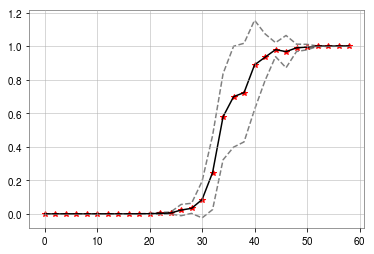

40


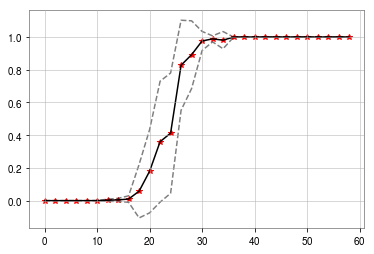

30


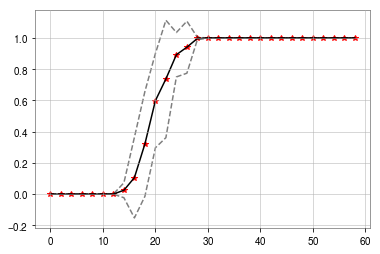

25


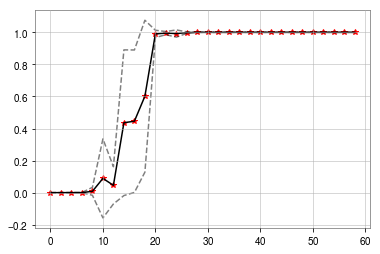

20


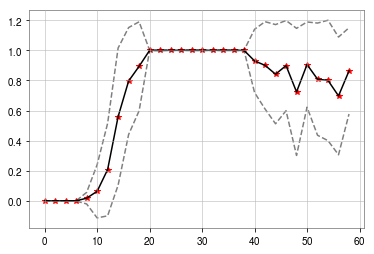

16


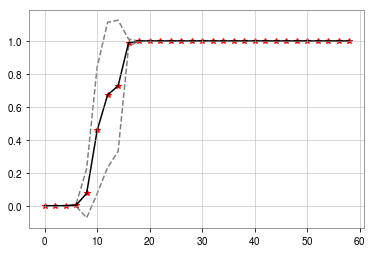

12


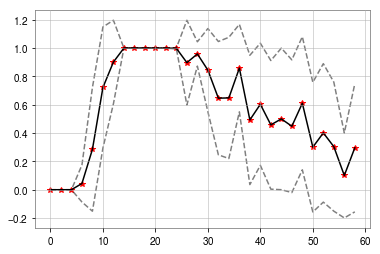

10


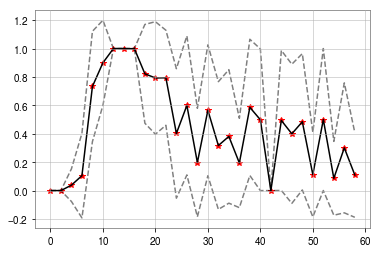

In [14]:
for s in [60,40,30,25,20,16,12,10]:
    print(s)
    data= TAR_test('RUN_08/realtoSNR'+str(s)
                        ,parameters=['cbc_02','real',np.arange(0,60,2)]        
                           ,length=4           
                           ,fs=2048               
                           ,size=100             
                           ,detectors='HLV'  
                           ,spec=True
                           ,phase=True
                           ,res=128
                           ,noise_file=['20170814','SEG5_1186730169_878s.txt']
                           ,t=32             
                           ,batch_size=1
                           ,starting_point=32
                           ,name=''          
                           ,destination_path='/home/vasileios.skliris/EMILY/datasets/cbc/'
                           ,demo=False)
    plt.show()

In [ ]:

data= TAR_test('RUN_06/realhlv_30TO10_2_toSNR'+str(s)
                    ,parameters=['cbc_02','real',np.arange(0,60,0.1)]        
                       ,length=4           
                       ,fs=2048               
                       ,size=10             
                       ,detectors='HLV'  
                       ,spec=True
                       ,phase=True
                       ,res=128
                       ,noise_file=['20170814','SEG5_1186730169_878s.txt']
                       ,t=32             
                       ,batch_size=1
                       ,starting_point=32
                       ,name=''          
                       ,destination_path='/home/vasileios.skliris/EMILY/datasets/cbc/'
                       ,demo=False)
plt.show()

In [154]:
data['60'].shape



(10, 8192, 3)

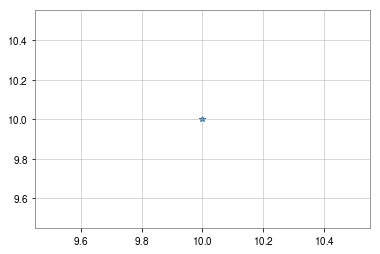

In [164]:
plt.plot(10,10,'*')

In [2]:
b=100
a=0
while b>0:
    print(b,a)
    b-=1
    a+=1
    if a==20: break
    

100 0
99 1
98 2
97 3
96 4
95 5
94 6
93 7
92 8
91 9
90 10
89 11
88 12
87 13
86 14
85 15
84 16
83 17
82 18
81 19


In [6]:
fs=2048
H=load_noise(fs,'20170815','H','SEG1_1186823203_17644s.txt')

In [7]:
L=load_noise(fs,'20170815','L','SEG1_1186823203_17644s.txt')

In [9]:
V=load_noise(fs,'20170815','V','SEG1_1186823203_17644s.txt')

In [10]:
print(len(H)/fs,len(L)/fs,len(V)/fs)

17644.0 17644.0 12288.0
